In [121]:
import pandas as pd
import numpy as np
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
%matplotlib inline

In [5]:
BIO = pd.read_csv('data/bio_all_date_processed.csv')
ZTS = pd.read_csv('data/zts_all_date_processed.csv')
BIO = BIO.loc[:, 'Report Date': 's_diff']
ZTS = ZTS.loc[:, 'Report Date': 's_diff']

In [141]:
# training
BIO_1 = pd.read_csv('data/window_data/bio_train_group0_2020-03-02_2020-12-31.csv')
BIO_2 = pd.read_csv('data/window_data/bio_train_group1_2020-06-01_2021-03-31.csv')
BIO_3 = pd.read_csv('data/window_data/bio_train_group2_2020-09-01_2021-06-30.csv')
BIO_4 = pd.read_csv('data/window_data/bio_train_group3_2021-01-01_2021-09-30.csv')
BIO_5 = pd.read_csv('data/window_data/bio_train_group4_2021-03-01_2021-12-31.csv')
BIO_1 = BIO_1.loc[:, 'Report Date': 's_diff']
BIO_2 = BIO_2.loc[:, 'Report Date': 's_diff']
BIO_3 = BIO_3.loc[:, 'Report Date': 's_diff']
BIO_4 = BIO_4.loc[:, 'Report Date': 's_diff']
BIO_5 = BIO_5.loc[:, 'Report Date': 's_diff']

In [142]:
# testing
BIO_1_t = pd.read_csv('data/window_data/bio_test_group0_2021-01-01_2021-06-30.csv')
BIO_2_t = pd.read_csv('data/window_data/bio_test_group1_2021-04-01_2021-09-30.csv')
BIO_3_t = pd.read_csv('data/window_data/bio_test_group2_2021-07-01_2021-12-31.csv')
BIO_4_t = pd.read_csv('data/window_data/bio_test_group3_2021-10-01_2022-04-24.csv')
BIO_5_t = pd.read_csv('data/window_data/bio_test_group4_2022-01-01_2022-04-24.csv')
BIO_1_t = BIO_1_t.loc[:, 'Report Date': 's_diff']
BIO_2_t = BIO_2_t.loc[:, 'Report Date': 's_diff']
BIO_3_t = BIO_3_t.loc[:, 'Report Date': 's_diff']
BIO_4_t = BIO_4_t.loc[:, 'Report Date': 's_diff']
BIO_5_t = BIO_5_t.loc[:, 'Report Date': 's_diff']


In [197]:
def feature_selection_FS(training_dataset, testing_dataset, bar):
    """
    find the important feature using Fishers' score
    """
    X = training_dataset.iloc[:, 3:]
    Y_price = training_dataset['Stock price']
    Y_dummy = training_dataset['Y_boolean']
    date_train = training_dataset['Report Date']
    date_test = testing_dataset['Report Date']
    
    ranks = fisher_score.fisher_score(X.to_numpy(), Y_dummy)
    feat_importances = pd.Series(ranks, training_dataset.columns[3:])
    feat_importances.plot(kind='barh', color ="teal")
    plt.show()
    
    feat_selected = feat_importances.to_frame('importance')
    # select importance > than bar
    print(feat_selected)
    feat_selected = feat_selected[feat_selected['importance'] > bar]
    select_feature_lst = list(feat_selected.index)
    X1 = X[np.intersect1d(X.columns, select_feature_lst)]
    Y_true_price = testing_dataset['Stock price']
    Y_true = testing_dataset['Y_boolean']
    testing_dataset = testing_dataset[np.intersect1d(testing_dataset.columns, select_feature_lst)]
    
    new_training_dataset = pd.merge(Y_price, Y_dummy, left_index=True, right_index=True)
    new_training_dataset = pd.merge(new_training_dataset, X1, left_index=True, right_index=True)
    new_training_dataset = pd.merge(date_train, new_training_dataset, left_index=True, right_index=True)
    
    new_testing_dataset = pd.merge(Y_true_price, Y_true, left_index=True, right_index=True)
    new_testing_dataset = pd.merge(new_testing_dataset, testing_dataset,left_index=True, right_index=True)
    new_testing_dataset = pd.merge(date_test, new_testing_dataset, left_index=True, right_index=True)
    
    return new_training_dataset, new_testing_dataset
    

In [203]:
def feature_selection_IG(training_dataset, testing_dataset, bar):
    """
    find the important feature using IG method
    """

    X = training_dataset.iloc[:, 3:]
    Y_price = training_dataset['Stock price']
    Y_dummy = training_dataset['Y_boolean']
    date_train = training_dataset['Report Date']
    date_test = testing_dataset['Report Date']
    
    importances = mutual_info_classif(X, Y_dummy, random_state=1241)
    feat_importances = pd.Series(importances, training_dataset.columns[3:])
    feat_importances.plot(kind='barh', color ="teal")
    plt.show()
    
    feat_selected = feat_importances.to_frame('importance')
    # select importance > than bar
    feat_selected = feat_selected[feat_selected['importance'] > bar]
    select_feature_lst = list(feat_selected.index)
    X1 = X[np.intersect1d(X.columns, select_feature_lst)]
    Y_true_price = testing_dataset['Stock price']
    Y_true = testing_dataset['Y_boolean']
    testing_dataset = testing_dataset[np.intersect1d(testing_dataset.columns, select_feature_lst)]
    
    new_training_dataset = pd.merge(Y_price, Y_dummy, left_index=True, right_index=True)
    new_training_dataset = pd.merge(new_training_dataset, X1, left_index=True, right_index=True)
    new_training_dataset = pd.merge(date_train, new_training_dataset, left_index=True, right_index=True)
    
    new_testing_dataset = pd.merge(Y_true_price, Y_true, left_index=True, right_index=True)
    new_testing_dataset = pd.merge(new_testing_dataset, testing_dataset,left_index=True, right_index=True)
    new_testing_dataset = pd.merge(date_test, new_testing_dataset, left_index=True, right_index=True)
    
    print(new_training_dataset)
    return new_training_dataset, new_testing_dataset
    

In [199]:
def feature_selection_correlation(training_dataset, bar):
    """
    select feature based on Correlation Coefficient
    """
    # BIO.values > 60
    check = training_dataset.corr()
    correlate_num = check[abs(check) >= bar].isna().sum().sum()/check[abs(check) >= bar].notnull().sum().sum()
    
    plt.figure(figsize = (10,6))
    sns.heatmap(check, annot = True)
    # if return true, then no need deduction. can use 20?
    return correlate_num >= bar 

In [221]:
def test_feature_select(training_dataset):
    """
    check the performance of the current selected: use only training dataset accuracy 
    """
    # run baseline logit
    logit = LogisticRegression(solver = 'lbfgs', random_state=1241)
    X = training_dataset.iloc[:, 3:]
    Y_dummy = training_dataset['Y_boolean']
    logit.fit(X, Y_dummy)
    Y_pred = logit.predict(X)
    # pred = lr.predict(testing_dataset)
#     score = logit.score(testing_dataset, Y_true)
    
    score = accuracy_score(Y_dummy, Y_pred)
    print(f"accuracy score is {score}")
    return score
    

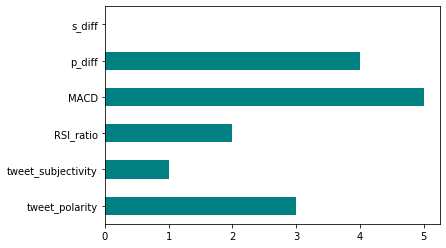

                    importance
tweet_polarity               3
tweet_subjectivity           1
RSI_ratio                    2
MACD                         5
p_diff                       4
s_diff                       0


C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

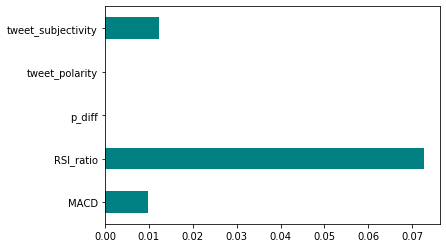

    Report Date  Stock price  Y_boolean  RSI_ratio  tweet_subjectivity
0      2020/3/2   368.950012          1   0.345478            0.000000
1      2020/3/3   370.000000          0   0.345478            0.233343
2      2020/3/4   384.929993          1   0.345478            0.878401
3      2020/3/5   386.679993          1   0.345478            0.160108
4      2020/3/6   374.559998         -1   0.345478            0.287597
..          ...          ...        ...        ...                 ...
300  2020/12/27   572.759995          0   0.089561            0.849189
301  2020/12/28   571.989990          0   0.014782            0.688856
302  2020/12/29   574.919983          1   0.122708            0.615352
303  2020/12/30   574.830017          0   0.177799            0.774942
304  2020/12/31   582.940002          1   0.523389            0.820658

[305 rows x 5 columns]


C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


0.4786885245901639

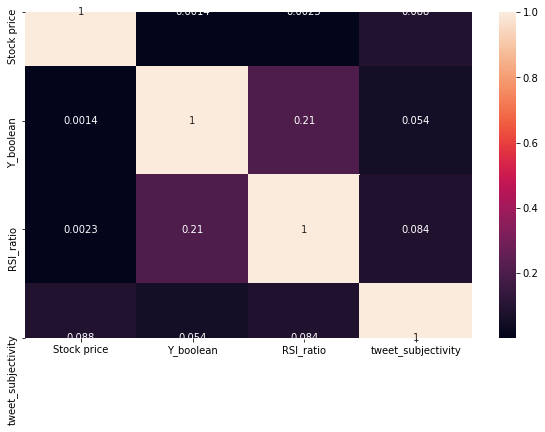

In [500]:
# BIO GROUP 1 - contain only daily data

BIO_1 = pd.read_csv('data/window_data/bio_train_group0_2020-03-02_2020-12-31.csv')
BIO_1_t = pd.read_csv('data/window_data/bio_test_group0_2021-01-01_2021-06-30.csv')
BIO_1_Y = BIO_1.loc[:, 'Report Date': 'Y_boolean']
BIO_1_Yt = BIO_1_t.loc[:, 'Report Date': 'Y_boolean']
BIO_1_t = BIO_1_t.loc[:, 'tweet_polarity': 's_diff']
BIO_1 = BIO_1.loc[:, 'tweet_polarity': 's_diff']
BIO_1 = pd.merge(BIO_1_Y, BIO_1, left_index=True, right_index=True)
BIO_1_t = pd.merge(BIO_1_Yt, BIO_1_t, left_index=True, right_index=True)

# can be adjusted
bar_FS = 0
bar_IG = 0.01
bar_corr = 15

BIO_1, BIO_1_t = feature_selection_FS(BIO_1, BIO_1_t, bar_FS)
BIO_1, BIO_1_t = feature_selection_IG(BIO_1, BIO_1_t, bar_IG)
feature_selection_correlation(BIO_1, bar_corr)

test_feature_select(BIO_1)


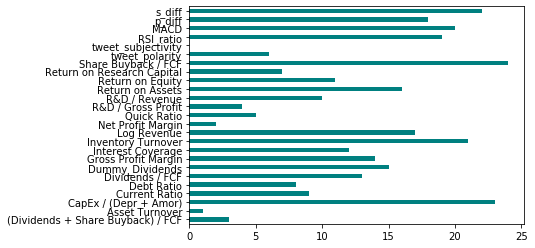

                                   importance
(Dividends + Share Buyback) / FCF           3
Asset Turnover                              1
CapEx / (Depr + Amor)                      23
Current Ratio                               9
Debt Ratio                                  8
Dividends / FCF                            13
Dummy_Dividends                            15
Gross Profit Margin                        14
Interest Coverage                          12
Inventory Turnover                         21
Log Revenue                                17
Net Profit Margin                           2
Quick Ratio                                 5
R&D / Gross Profit                          4
R&D / Revenue                              10
Return on Assets                           16
Return on Equity                           11
Return on Research Capital                  7
Share Buyback / FCF                        24
tweet_polarity                              6
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

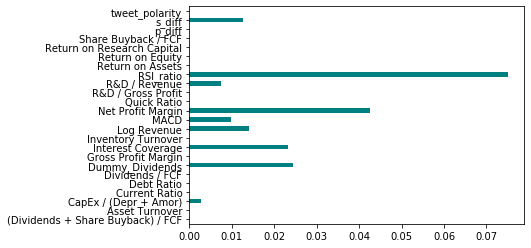

    Report Date  Stock price  Y_boolean  Dummy_Dividends  Interest Coverage  \
0      2020/3/2   368.950012          1                0            0.07402   
1      2020/3/3   370.000000          0                0            0.07402   
2      2020/3/4   384.929993          1                0            0.07402   
3      2020/3/5   386.679993          1                0            0.07402   
4      2020/3/6   374.559998         -1                0            0.07402   
..          ...          ...        ...              ...                ...   
300  2020/12/27   572.759995          0                0            0.00000   
301  2020/12/28   571.989990          0                0            0.00000   
302  2020/12/29   574.919983          1                0            0.00000   
303  2020/12/30   574.830017          0                0            1.00000   
304  2020/12/31   582.940002          1                0            1.00000   

     Net Profit Margin  RSI_ratio  
0             0

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


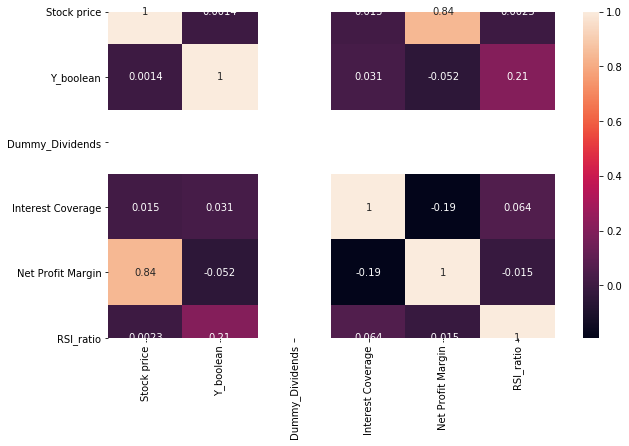

In [499]:
# BIO GROUP 0

BIO_0 = pd.read_csv('data/window_data/bio_train_group0_2020-03-02_2020-12-31.csv')
BIO_0_t = pd.read_csv('data/window_data/bio_test_group0_2021-01-01_2021-06-30.csv')
BIO_0_t = BIO_0_t.loc[:, 'Report Date': 's_diff']
BIO_0 = BIO_0.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 0
bar_IG = 0.015
bar_corr = 15

BIO_0, BIO_0_t = feature_selection_FS(BIO_0, BIO_0_t, bar_FS)
BIO_0, BIO_0_t = feature_selection_IG(BIO_0, BIO_0_t, bar_IG)
feature_selection_correlation(BIO_0, bar_corr)

test_feature_select(BIO_0)

# save selected_feature_data
BIO_0.to_csv(f'selected_feature_data/BIO_Group0_training.csv')
BIO_0_t.to_csv(f'selected_feature_data/BIO_Group0_testing.csv')

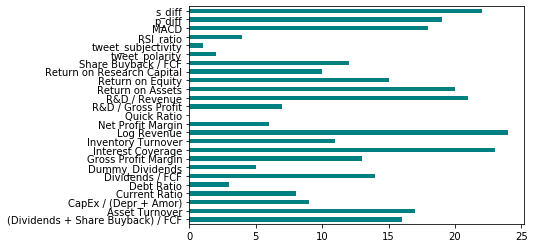

                                   importance
(Dividends + Share Buyback) / FCF          16
Asset Turnover                             17
CapEx / (Depr + Amor)                       9
Current Ratio                               8
Debt Ratio                                  3
Dividends / FCF                            14
Dummy_Dividends                             5
Gross Profit Margin                        13
Interest Coverage                          23
Inventory Turnover                         11
Log Revenue                                24
Net Profit Margin                           6
Quick Ratio                                 0
R&D / Gross Profit                          7
R&D / Revenue                              21
Return on Assets                           20
Return on Equity                           15
Return on Research Capital                 10
Share Buyback / FCF                        12
tweet_polarity                              2
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

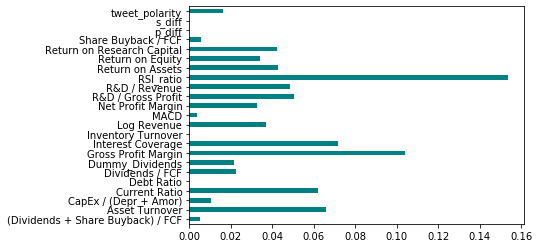

    Report Date  Stock price  Y_boolean  Asset Turnover  Current Ratio  \
0    2020-06-01   492.420013          0        1.000000       0.098308   
1    2020-06-02   493.059998          0        1.000000       0.098308   
2    2020-06-03   470.739990         -1        1.000000       0.098308   
3    2020-06-04   463.850006         -1        1.000000       0.098308   
4    2020-06-05   452.519989         -1        1.000000       0.098308   
..          ...          ...        ...             ...            ...   
299  2021-03-27   575.740011         -1        0.027183       0.050119   
300  2021-03-28   572.889994         -1        0.027183       0.050119   
301  2021-03-29   570.039978         -1        0.027183       0.050119   
302  2021-03-30   564.150024         -1        0.027183       0.050119   
303  2021-03-31   571.169983          1        0.311111       1.000000   

     Dividends / FCF  Dummy_Dividends  Gross Profit Margin  Interest Coverage  \
0                0.0          

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


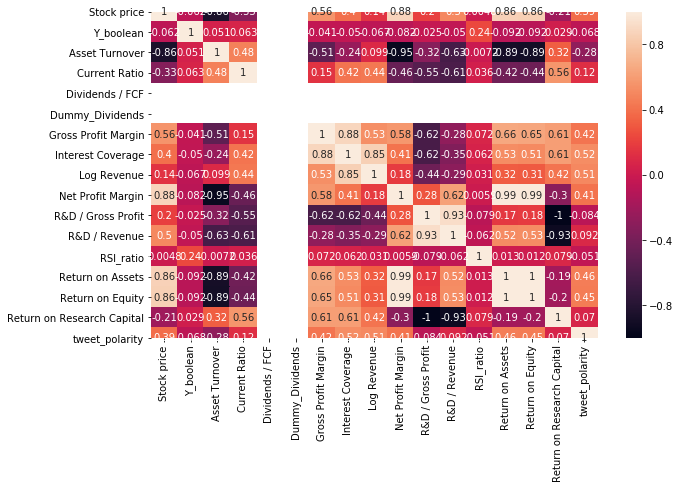

In [498]:
# BIO GROUP 1 
BIO_1 = pd.read_csv('data/window_data/bio_train_group1_2020-06-01_2021-03-31.csv')
BIO_1_t = pd.read_csv('data/window_data/bio_test_group1_2021-04-01_2021-09-30.csv')
BIO_1_t = BIO_1_t.loc[:, 'Report Date': 's_diff']
BIO_1 = BIO_1.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 1
bar_IG = 0.015
bar_corr = 15

BIO_1, BIO_1_t = feature_selection_FS(BIO_1, BIO_1_t, bar_FS)
BIO_1, BIO_1_t = feature_selection_IG(BIO_1, BIO_1_t, bar_IG)
feature_selection_correlation(BIO_1, bar_corr)

test_feature_select(BIO_1)


# save selected_feature_data
BIO_1.to_csv('selected_feature_data/BIO_Group1_training.csv')
BIO_1_t.to_csv('selected_feature_data/BIO_Group1_testing.csv')

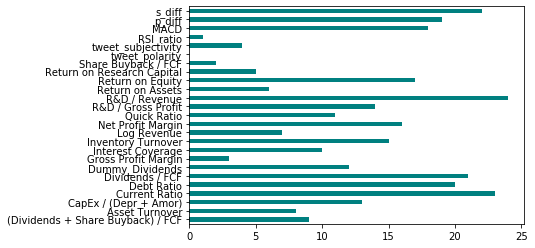

                                   importance
(Dividends + Share Buyback) / FCF           9
Asset Turnover                              8
CapEx / (Depr + Amor)                      13
Current Ratio                              23
Debt Ratio                                 20
Dividends / FCF                            21
Dummy_Dividends                            12
Gross Profit Margin                         3
Interest Coverage                          10
Inventory Turnover                         15
Log Revenue                                 7
Net Profit Margin                          16
Quick Ratio                                11
R&D / Gross Profit                         14
R&D / Revenue                              24
Return on Assets                            6
Return on Equity                           17
Return on Research Capital                  5
Share Buyback / FCF                         2
tweet_polarity                              0
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

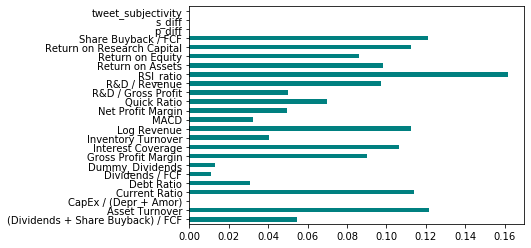

    Report Date  Stock price  Y_boolean  Asset Turnover  Current Ratio  \
0    2020-09-01   509.660004          0         1.00000       0.075082   
1    2020-09-02   524.299988          1         1.00000       0.075082   
2    2020-09-03   494.239990         -1         1.00000       0.075082   
3    2020-09-04   484.230011         -1         1.00000       0.075082   
4    2020-09-05   482.877510          0         1.00000       0.075082   
..          ...          ...        ...             ...            ...   
298  2021-06-26   636.940002          1         0.63844       0.859060   
299  2021-06-27   640.320007          1         0.63844       0.859060   
300  2021-06-28   643.700012          1         0.63844       0.859060   
301  2021-06-29   645.559998          0         0.63844       0.859060   
302  2021-06-30   644.289978          0         0.00000       1.000000   

     Gross Profit Margin  Interest Coverage  Log Revenue  R&D / Revenue  \
0               0.256611           0

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


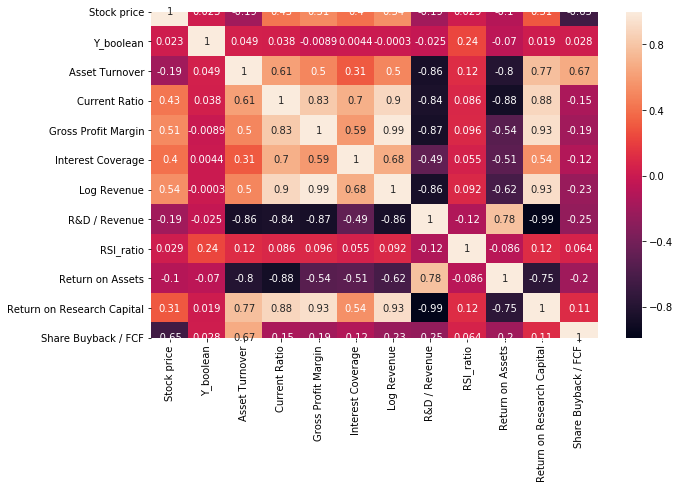

In [497]:
# BIO GROUP 2
BIO_2 = pd.read_csv('data/window_data/bio_train_group2_2020-09-01_2021-06-30.csv')
BIO_2_t = pd.read_csv('data/window_data/bio_test_group2_2021-07-01_2021-12-31.csv')
BIO_2_t = BIO_2_t.loc[:, 'Report Date': 's_diff']
BIO_2 = BIO_2.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 0
bar_IG = 0.09
bar_corr = 15

BIO_2, BIO_2_t = feature_selection_FS(BIO_2, BIO_2_t, bar_FS)
BIO_2, BIO_2_t = feature_selection_IG(BIO_2, BIO_2_t, bar_IG)
feature_selection_correlation(BIO_2, bar_corr)

test_feature_select(BIO_2)


# save selected_feature_data
BIO_2.to_csv('selected_feature_data/BIO_Group2_training.csv')
BIO_2_t.to_csv('selected_feature_data/BIO_Group2_testing.csv')


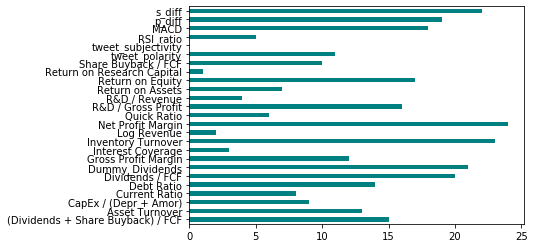

                                   importance
(Dividends + Share Buyback) / FCF          15
Asset Turnover                             13
CapEx / (Depr + Amor)                       9
Current Ratio                               8
Debt Ratio                                 14
Dividends / FCF                            20
Dummy_Dividends                            21
Gross Profit Margin                        12
Interest Coverage                           3
Inventory Turnover                         23
Log Revenue                                 2
Net Profit Margin                          24
Quick Ratio                                 6
R&D / Gross Profit                         16
R&D / Revenue                               4
Return on Assets                            7
Return on Equity                           17
Return on Research Capital                  1
Share Buyback / FCF                        10
tweet_polarity                             11
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

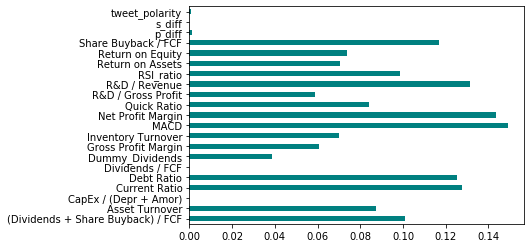

    Report Date  Stock price  Y_boolean  (Dividends + Share Buyback) / FCF  \
0    2021-01-01   581.020004         -1                            0.00000   
1    2021-01-02   579.100006         -1                            0.00000   
2    2021-01-03   577.180008         -1                            0.00000   
3    2021-01-04   575.260010         -1                            0.00000   
4    2021-01-05   584.130005          1                            0.00000   
..          ...          ...        ...                                ...   
268  2021-09-26   778.653341         -1                            1.00000   
269  2021-09-27   766.500000         -1                            1.00000   
270  2021-09-28   753.030029         -1                            1.00000   
271  2021-09-29   749.270019         -1                            1.00000   
272  2021-09-30   745.950012         -1                            0.05363   

     Asset Turnover  Current Ratio  Debt Ratio  Gross Profit Ma

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


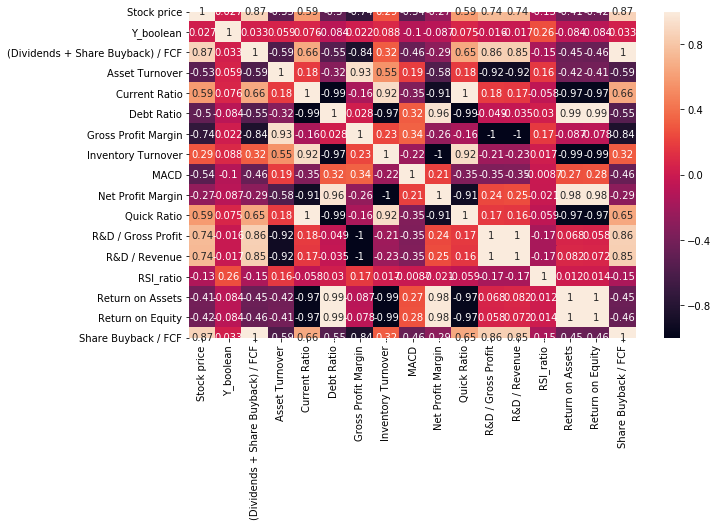

In [496]:
# BIO GROUP 3
BIO_3 = pd.read_csv('data/window_data/bio_train_group3_2021-01-01_2021-09-30.csv')
BIO_3_t = pd.read_csv('data/window_data/bio_test_group3_2021-10-01_2022-04-24.csv')
BIO_3_t = BIO_3_t.loc[:, 'Report Date': 's_diff']
BIO_3 = BIO_3.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 3
bar_IG = 0.05
bar_corr = 15

BIO_3, BIO_3_t = feature_selection_FS(BIO_3, BIO_3_t, bar_FS)
BIO_3, BIO_3_t = feature_selection_IG(BIO_3, BIO_3_t, bar_IG)
feature_selection_correlation(BIO_3, bar_corr)

test_feature_select(BIO_3)


# save selected_feature_data
BIO_3.to_csv('selected_feature_data/BIO_Group3_training.csv')
BIO_3_t.to_csv('selected_feature_data/BIO_Group3_testing.csv')


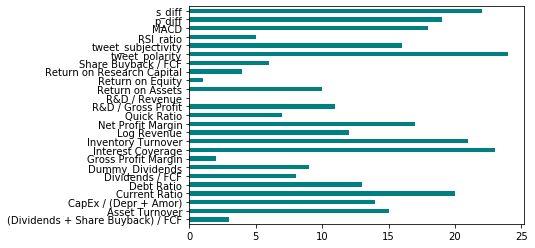

                                   importance
(Dividends + Share Buyback) / FCF           3
Asset Turnover                             15
CapEx / (Depr + Amor)                      14
Current Ratio                              20
Debt Ratio                                 13
Dividends / FCF                             8
Dummy_Dividends                             9
Gross Profit Margin                         2
Interest Coverage                          23
Inventory Turnover                         21
Log Revenue                                12
Net Profit Margin                          17
Quick Ratio                                 7
R&D / Gross Profit                         11
R&D / Revenue                               0
Return on Assets                           10
Return on Equity                            1
Return on Research Capital                  4
Share Buyback / FCF                         6
tweet_polarity                             24
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

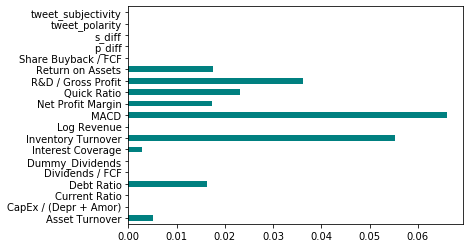

    Report Date  Stock price  Y_boolean  Debt Ratio  Inventory Turnover  \
0    2021-03-01   597.299988          1    1.000000            0.000000   
1    2021-03-02   591.219971         -1    1.000000            0.000000   
2    2021-03-03   566.869995         -1    1.000000            0.000000   
3    2021-03-04   562.000000         -1    1.000000            0.000000   
4    2021-03-05   567.919983          1    1.000000            0.000000   
..          ...          ...        ...         ...                 ...   
301  2021-12-27   764.320007          1    0.003817            0.713203   
302  2021-12-28   747.760010         -1    0.003817            0.713203   
303  2021-12-29   750.739990          1    0.003817            0.713203   
304  2021-12-30   758.650024          1    0.000000            0.996922   
305  2021-12-31   755.570007         -1    0.000000            0.996922   

         MACD  Net Profit Margin  Quick Ratio  R&D / Gross Profit  \
0    0.800959           0.2309

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


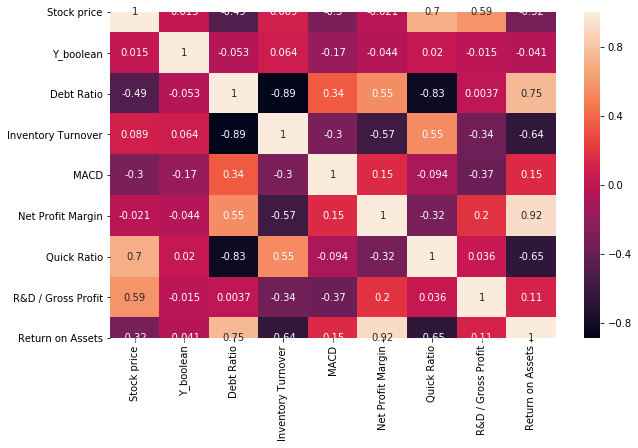

In [495]:
# BIO GROUP 4
BIO_4 = pd.read_csv('data/window_data/bio_train_group4_2021-03-01_2021-12-31.csv')
BIO_4_t = pd.read_csv('data/window_data/bio_test_group4_2022-01-01_2022-04-24.csv')
BIO_4_t = BIO_4_t.loc[:, 'Report Date': 's_diff']
BIO_4 = BIO_4.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 5
bar_IG = 0.01
bar_corr = 15

BIO_4, BIO_4_t = feature_selection_FS(BIO_4, BIO_4_t, bar_FS)
BIO_4, BIO_4_t = feature_selection_IG(BIO_4, BIO_4_t, bar_IG)
feature_selection_correlation(BIO_4, bar_corr)

test_feature_select(BIO_4)


# save selected_feature_data
BIO_4.to_csv('selected_feature_data/BIO_Group4_training.csv')
BIO_4_t.to_csv('selected_feature_data/BIO_Group4_testing.csv')


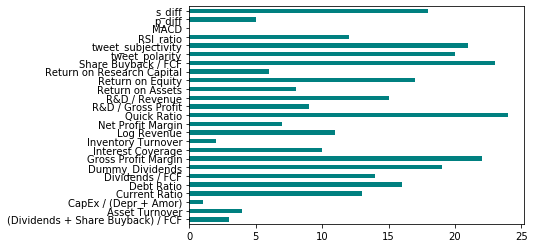

                                   importance
(Dividends + Share Buyback) / FCF           3
Asset Turnover                              4
CapEx / (Depr + Amor)                       1
Current Ratio                              13
Debt Ratio                                 16
Dividends / FCF                            14
Dummy_Dividends                            19
Gross Profit Margin                        22
Interest Coverage                          10
Inventory Turnover                          2
Log Revenue                                11
Net Profit Margin                           7
Quick Ratio                                24
R&D / Gross Profit                          9
R&D / Revenue                              15
Return on Assets                            8
Return on Equity                           17
Return on Research Capital                  6
Share Buyback / FCF                        23
tweet_polarity                             20
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

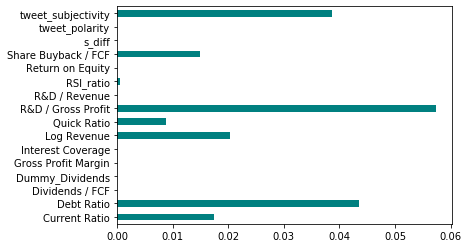

    Report Date  Stock price  Y_boolean  Current Ratio  Debt Ratio  \
0      2020/3/2   137.099838          1       0.000000    0.000000   
1      2020/3/3   135.451584         -1       0.000000    0.000000   
2      2020/3/4   141.748428          1       0.000000    0.000000   
3      2020/3/5   137.741333         -1       0.000000    0.000000   
4      2020/3/6   135.264053         -1       0.000000    0.000000   
..          ...          ...        ...            ...         ...   
300  2020/12/27   160.545532          0       1.000000    1.000000   
301  2020/12/28   160.959351          0       1.000000    1.000000   
302  2020/12/29   161.682907          1       1.000000    1.000000   
303  2020/12/30   162.822800          1       0.221527    0.075888   
304  2020/12/31   164.041962          1       0.221527    0.075888   

     Log Revenue  Quick Ratio  R&D / Gross Profit  RSI_ratio  \
0       0.574210     0.000000            1.000000   0.172998   
1       0.574210     0.000000  

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


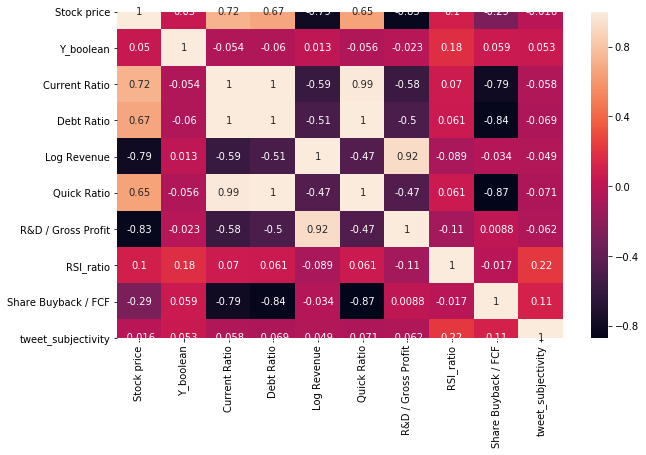

In [494]:
# ZTS GROUP 0

ZTS_0 = pd.read_csv('data/window_data/zts_train_group0_2020-03-02_2020-12-31.csv')
ZTS_0_t = pd.read_csv('data/window_data/zts_test_group0_2021-01-01_2021-06-30.csv')
ZTS_0_t = ZTS_0_t.loc[:, 'Report Date': 's_diff']
ZTS_0 = ZTS_0.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 8
bar_IG = 0
bar_corr = 15

ZTS_0, ZTS_0_t = feature_selection_FS(ZTS_0, ZTS_0_t, bar_FS)
ZTS_0, ZTS_0_t = feature_selection_IG(ZTS_0, ZTS_0_t, bar_IG)
feature_selection_correlation(ZTS_0, bar_corr)

test_feature_select(ZTS_0)

# save selected_feature_data
ZTS_0.to_csv(f'selected_feature_data/ZTS_Group0_training.csv')
ZTS_0_t.to_csv(f'selected_feature_data/ZTS_Group0_testing.csv')

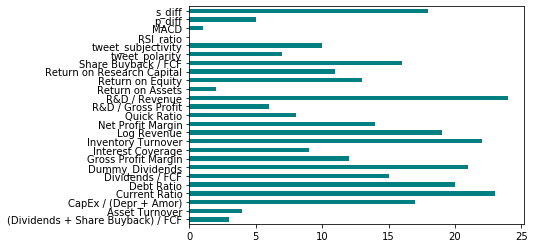

                                   importance
(Dividends + Share Buyback) / FCF           3
Asset Turnover                              4
CapEx / (Depr + Amor)                      17
Current Ratio                              23
Debt Ratio                                 20
Dividends / FCF                            15
Dummy_Dividends                            21
Gross Profit Margin                        12
Interest Coverage                           9
Inventory Turnover                         22
Log Revenue                                19
Net Profit Margin                          14
Quick Ratio                                 8
R&D / Gross Profit                          6
R&D / Revenue                              24
Return on Assets                            2
Return on Equity                           13
Return on Research Capital                 11
Share Buyback / FCF                        16
tweet_polarity                              7
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

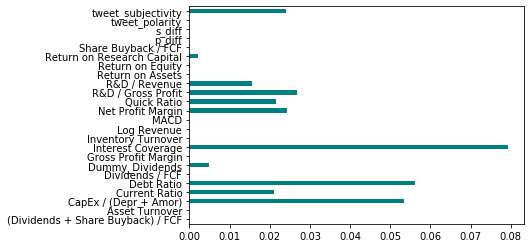

    Report Date  Stock price  Y_boolean  CapEx / (Depr + Amor)  Current Ratio  \
0    2020-06-01   136.758148          0               1.000000       0.000000   
1    2020-06-02   139.862274          1               1.000000       0.000000   
2    2020-06-03   140.900253          1               1.000000       0.000000   
3    2020-06-04   138.913239         -1               1.000000       0.000000   
4    2020-06-05   139.397629          1               1.000000       0.000000   
..          ...          ...        ...                    ...            ...   
299  2021-03-27   155.755417          1               0.474826       0.221527   
300  2021-03-28   156.496658          1               0.474826       0.221527   
301  2021-03-29   157.237900          1               0.474826       0.221527   
302  2021-03-30   155.897705         -1               0.474826       0.221527   
303  2021-03-31   156.334503          0               0.858191       0.496206   

     Debt Ratio  Interest C

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


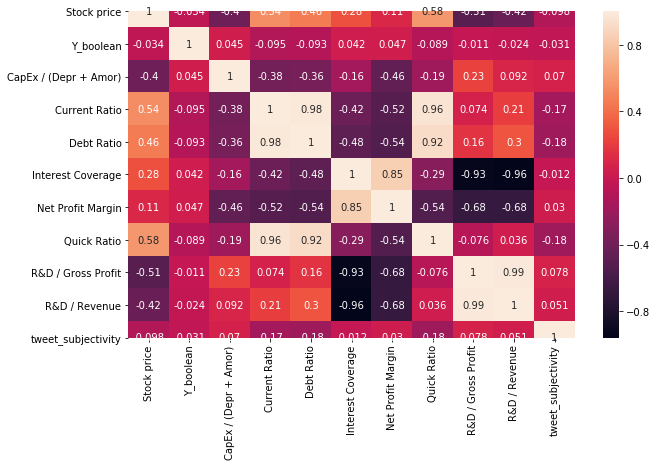

In [493]:
# ZTS GROUP 1

ZTS_1 = pd.read_csv('data/window_data/zts_train_group1_2020-06-01_2021-03-31.csv')
ZTS_1_t = pd.read_csv('data/window_data/zts_test_group1_2021-04-01_2021-09-30.csv')
ZTS_1_t = ZTS_1_t.loc[:, 'Report Date': 's_diff']
ZTS_1 = ZTS_1.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 0
bar_IG = 0.008
bar_corr = 15

ZTS_1, ZTS_1_t = feature_selection_FS(ZTS_1, ZTS_1_t, bar_FS)
ZTS_1, ZTS_1_t = feature_selection_IG(ZTS_1, ZTS_1_t, bar_IG)
feature_selection_correlation(ZTS_1, bar_corr)

test_feature_select(ZTS_1)

# save selected_feature_data
ZTS_1.to_csv(f'selected_feature_data/ZTS_Group1_training.csv')
ZTS_1_t.to_csv(f'selected_feature_data/ZTS_Group1_testing.csv')

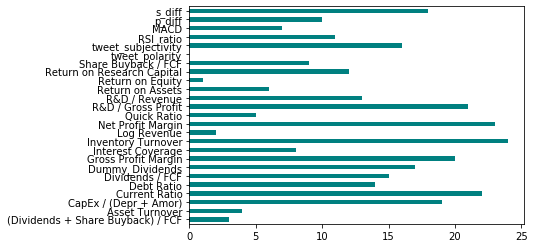

                                   importance
(Dividends + Share Buyback) / FCF           3
Asset Turnover                              4
CapEx / (Depr + Amor)                      19
Current Ratio                              22
Debt Ratio                                 14
Dividends / FCF                            15
Dummy_Dividends                            17
Gross Profit Margin                        20
Interest Coverage                           8
Inventory Turnover                         24
Log Revenue                                 2
Net Profit Margin                          23
Quick Ratio                                 5
R&D / Gross Profit                         21
R&D / Revenue                              13
Return on Assets                            6
Return on Equity                            1
Return on Research Capital                 12
Share Buyback / FCF                         9
tweet_polarity                              0
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

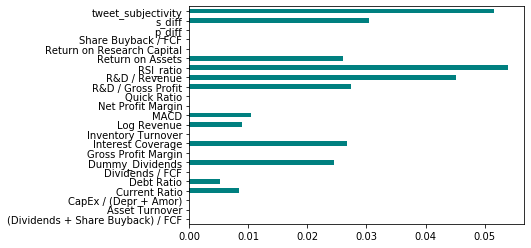

    Report Date  Stock price  Y_boolean  Dummy_Dividends  Interest Coverage  \
0    2020-09-01   160.421524          1              0.0           0.301079   
1    2020-09-02   163.668594          1              0.0           0.301079   
2    2020-09-03   157.204224         -1              0.0           0.301079   
3    2020-09-04   155.659897         -1              0.0           0.301079   
4    2020-09-05   154.736763         -1              0.0           0.301079   
..          ...          ...        ...              ...                ...   
298  2021-06-26   186.095235          0              0.0           0.000000   
299  2021-06-27   186.045527          0              0.0           0.000000   
300  2021-06-28   185.995819          0              0.0           0.000000   
301  2021-06-29   186.900543          1              0.0           0.000000   
302  2021-06-30   185.279999         -1              0.0           1.000000   

     R&D / Gross Profit  R&D / Revenue  RSI_ratio  

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


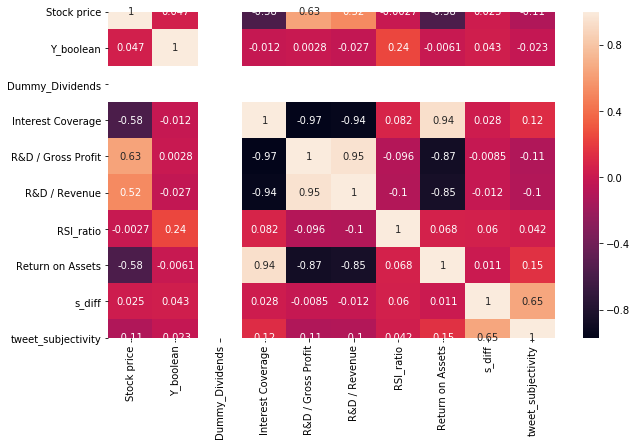

In [492]:
# ZTS GROUP 2

ZTS_2 = pd.read_csv('data/window_data/zts_train_group2_2020-09-01_2021-06-30.csv')
ZTS_2_t = pd.read_csv('data/window_data/zts_test_group2_2021-07-01_2021-12-31.csv')
ZTS_2_t = ZTS_2_t.loc[:, 'Report Date': 's_diff']
ZTS_2 = ZTS_2.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 1
bar_IG = 0.02
bar_corr = 15

ZTS_2, ZTS_2_t = feature_selection_FS(ZTS_2, ZTS_2_t, bar_FS)
ZTS_2, ZTS_2_t = feature_selection_IG(ZTS_2, ZTS_2_t, bar_IG)
feature_selection_correlation(ZTS_2, bar_corr)

test_feature_select(ZTS_2)

# save selected_feature_data
ZTS_2.to_csv(f'selected_feature_data/ZTS_Group2_training.csv')
ZTS_2_t.to_csv(f'selected_feature_data/ZTS_Group2_testing.csv')

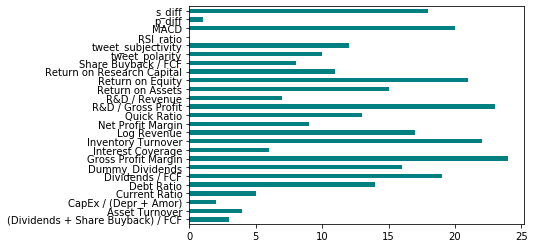

                                   importance
(Dividends + Share Buyback) / FCF           3
Asset Turnover                              4
CapEx / (Depr + Amor)                       2
Current Ratio                               5
Debt Ratio                                 14
Dividends / FCF                            19
Dummy_Dividends                            16
Gross Profit Margin                        24
Interest Coverage                           6
Inventory Turnover                         22
Log Revenue                                17
Net Profit Margin                           9
Quick Ratio                                13
R&D / Gross Profit                         23
R&D / Revenue                               7
Return on Assets                           15
Return on Equity                           21
Return on Research Capital                 11
Share Buyback / FCF                         8
tweet_polarity                             10
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

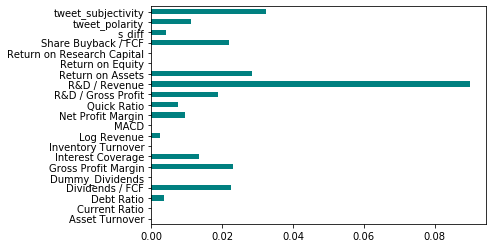

    Report Date  Stock price  Y_boolean  Debt Ratio  Dividends / FCF  \
0    2021-01-01   163.568665          0    1.000000         0.232342   
1    2021-01-02   163.095368          0    1.000000         0.232342   
2    2021-01-03   162.622070          0    1.000000         0.232342   
3    2021-01-04   162.148773          0    1.000000         0.232342   
4    2021-01-05   163.278717          1    1.000000         0.232342   
..          ...          ...        ...         ...              ...   
268  2021-09-26   199.202052         -1    0.198152         1.000000   
269  2021-09-27   196.902542         -1    0.198152         1.000000   
270  2021-09-28   191.895355         -1    0.198152         1.000000   
271  2021-09-29   194.105286          1    0.198152         1.000000   
272  2021-09-30   193.259140         -1    0.000000         0.775390   

     Gross Profit Margin  Interest Coverage  Net Profit Margin  Quick Ratio  \
0               0.655487           0.423754           0.

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


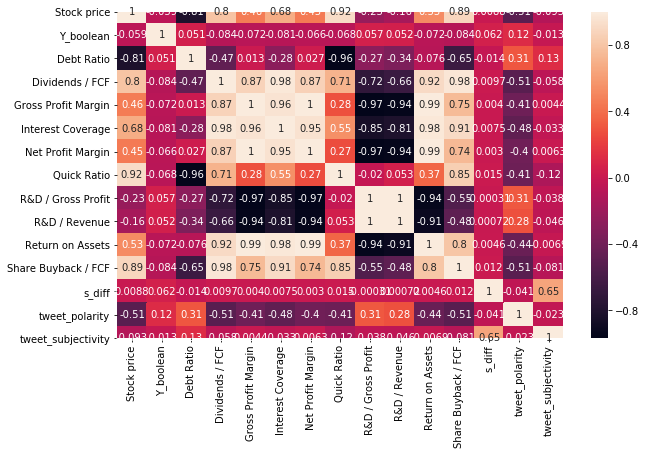

In [491]:
# ZTS GROUP 3

ZTS_3 = pd.read_csv('data/window_data/zts_train_group3_2021-01-01_2021-09-30.csv')
ZTS_3_t = pd.read_csv('data/window_data/zts_test_group3_2021-10-01_2022-04-24.csv')
ZTS_3_t = ZTS_3_t.loc[:, 'Report Date': 's_diff']
ZTS_3 = ZTS_3.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 3
bar_IG = 0.003
bar_corr = 15

ZTS_3, ZTS_3_t = feature_selection_FS(ZTS_3, ZTS_3_t, bar_FS)
ZTS_3, ZTS_3_t = feature_selection_IG(ZTS_3, ZTS_3_t, bar_IG)
feature_selection_correlation(ZTS_3, bar_corr)

test_feature_select(ZTS_3)

# save selected_feature_data
ZTS_3.to_csv(f'selected_feature_data/ZTS_Group3_training.csv')
ZTS_3_t.to_csv(f'selected_feature_data/ZTS_Group3_testing.csv')

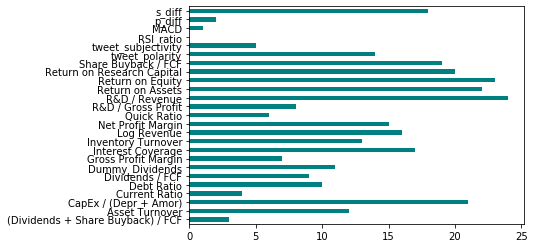

                                   importance
(Dividends + Share Buyback) / FCF           3
Asset Turnover                             12
CapEx / (Depr + Amor)                      21
Current Ratio                               4
Debt Ratio                                 10
Dividends / FCF                             9
Dummy_Dividends                            11
Gross Profit Margin                         7
Interest Coverage                          17
Inventory Turnover                         13
Log Revenue                                16
Net Profit Margin                          15
Quick Ratio                                 6
R&D / Gross Profit                          8
R&D / Revenue                              24
Return on Assets                           22
Return on Equity                           23
Return on Research Capital                 20
Share Buyback / FCF                        19
tweet_polarity                             14
tweet_subjectivity                

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

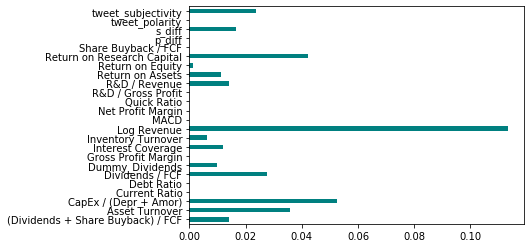

    Report Date  Stock price  Y_boolean  (Dividends + Share Buyback) / FCF  \
0    2021-03-01   156.542999          1                           0.061243   
1    2021-03-02   155.907638         -1                           0.061243   
2    2021-03-03   148.233887         -1                           0.061243   
3    2021-03-04   142.952576         -1                           0.061243   
4    2021-03-05   144.620331          1                           0.061243   
..          ...          ...        ...                                ...   
301  2021-12-27   245.684570          1                           0.797179   
302  2021-12-28   243.432159         -1                           0.797179   
303  2021-12-29   246.202850          1                           0.797179   
304  2021-12-30   244.339111         -1                           0.558092   
305  2021-12-31   243.212891         -1                           0.558092   

     Asset Turnover  CapEx / (Depr + Amor)  Dividends / FCF  Du

C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in longlong_scalars
  import sys
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\wugca\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


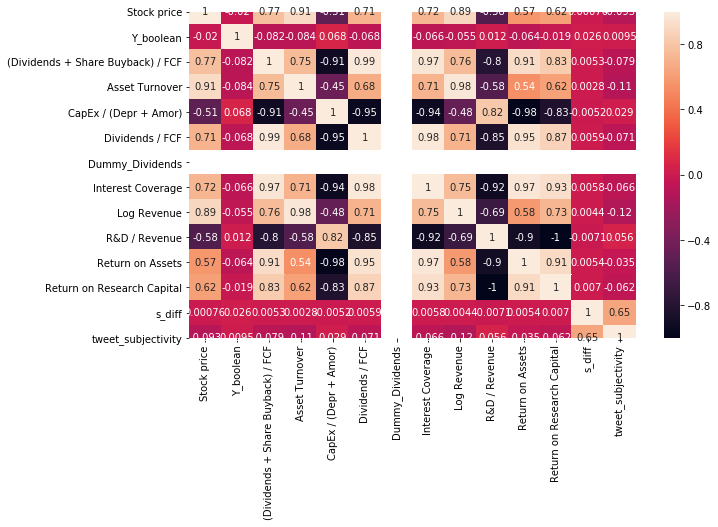

In [490]:
# ZTS GROUP 4

ZTS_4 = pd.read_csv('data/window_data/zts_train_group4_2021-03-01_2021-12-31.csv')
ZTS_4_t = pd.read_csv('data/window_data/zts_test_group4_2022-01-01_2022-04-24.csv')
ZTS_4_t = ZTS_4_t.loc[:, 'Report Date': 's_diff']
ZTS_4 = ZTS_4.loc[:, 'Report Date': 's_diff']

# can be adjusted
bar_FS = 0
bar_IG = 0.008
bar_corr = 15

ZTS_4, ZTS_4_t = feature_selection_FS(ZTS_4, ZTS_4_t, bar_FS)
ZTS_4, ZTS_4_t = feature_selection_IG(ZTS_4, ZTS_4_t, bar_IG)
feature_selection_correlation(ZTS_4, bar_corr)

test_feature_select(ZTS_4)

# save selected_feature_data
ZTS_4.to_csv(f'selected_feature_data/ZTS_Group4_training.csv')
ZTS_4_t.to_csv(f'selected_feature_data/ZTS_Group4_testing.csv')